# **Time Series Analysis** _Day 122_
##### Name: Muhammad Hassaan
##### Date: August 28, 2024
##### Email: muhammadhassaan7896@gmail.com

---

# **Time series analysis on the data International Airline passengers from 1940 to 1960**

---

In [129]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.metrics import RootMeanSquaredError
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential

In [130]:
# load data
df = pd.read_csv("./data/AirPassengers.csv")
values = df.iloc[:, 1].values  # Assuming the second column is the target
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [131]:
# check shape of the data
df.shape

(144, 2)

<Axes: xlabel='Month', ylabel='#Passengers'>

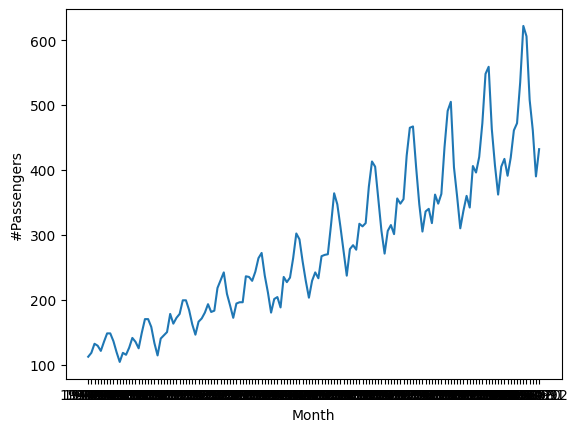

In [132]:
# plot this data to see trends and seasonality with seaborn
sns.lineplot(x='Month', y='#Passengers', data=df)

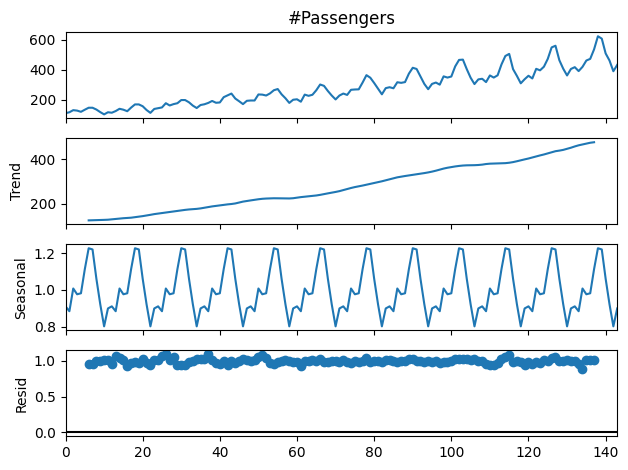

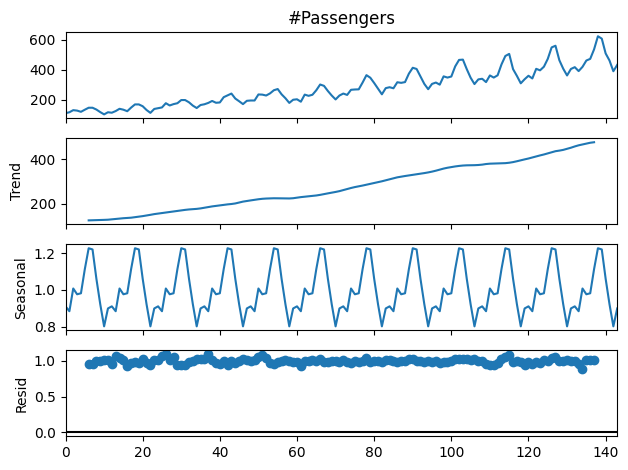

In [133]:
# decompose the data into trend, seasoonality, and residuals
decompose = seasonal_decompose(df['#Passengers'], model='multiplicative', period=12)
decompose.plot()

<Axes: >

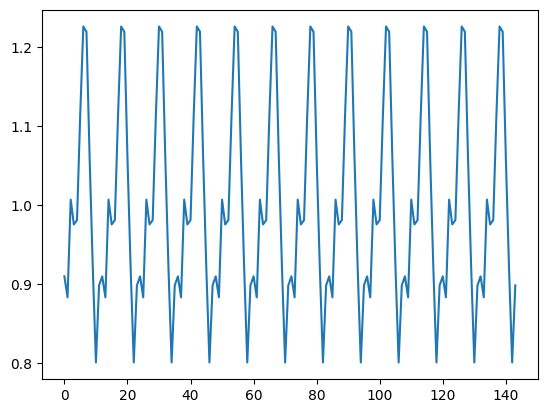

In [134]:
decompose.seasonal.plot()

In [135]:
trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid

Epoch 1/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2618.9849 - root_mean_squared_error: 50.1285
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 720.6277 - root_mean_squared_error: 25.9148
Epoch 3/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 786.7708 - root_mean_squared_error: 27.9261
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 770.7339 - root_mean_squared_error: 27.5757
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 573.4777 - root_mean_squared_error: 23.7235
Epoch 6/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 547.8567 - root_mean_squared_error: 23.2543
Epoch 7/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 652.8040 - root_mean_squared_error: 25.4401
Epoch 8/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 612.1947 - root_mean_squared_error: 24.6286
Epoch 9/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 525.3675 - root_mean_squared_error: 22.7989
Epoch 10/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

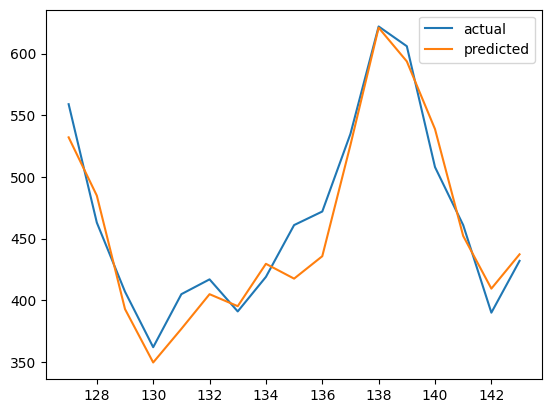

In [137]:
# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

# define the number of lagged time steps to use as input features
n_lags = 12

# create the input and output data for the neural network
X_train = np.array([train["#Passengers"].values[i:i+n_lags] for i in range(len(train)-n_lags)])
y_train = np.array(train["#Passengers"].values[n_lags:])
X_test = np.array([test["#Passengers"].values[i:i+n_lags] for i in range(len(test)-n_lags)])
y_test = np.array(test["#Passengers"].values[n_lags:])

# create the neural network model
model = Sequential()
model.add(Dense(10, input_dim=n_lags, activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[RootMeanSquaredError()])

# train the neural network model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

# make predictions on the testing set using the trained model
predictions = model.predict(X_test)

# plot the actual and predicted values
plt.plot(test.index[-len(predictions):], test["#Passengers"].values[-len(predictions):], label="actual")
plt.plot(test.index[-len(predictions):], predictions, label="predicted")
plt.legend()
plt.show()